## Linear Regression Assignment

## Problem Statement
To model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market

### STEP 1: Importing essential libraries

In [1]:
# importing required libraries and filtering warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#In order to view the results in all columns and rows
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

### STEP  2: Importing file and understanding data

In [3]:
# importing the required file
df1=pd.read_csv("day.csv")

In [4]:
# verifying the file has been loaded properly; viewing first 5 records of dataframe
df1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#viewing the last 5 records
df1.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [6]:
# viewing the shape
df1.shape

(730, 16)

In [7]:
# to understand the data statistically
df1.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


##### **--Observations--**
* By viewing percentile values, it seems to have outliers in variables like **'windspeed','casual'** as 75 percentile and max values have 2 fold difference. We will investigate on this later

In [8]:
# to view the datatype of column and presence of null values
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
#check for null values
df1.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
for i in df1.columns:
    print(df1[i].value_counts())
    print("\n")

instant
1      1
480    1
482    1
483    1
484    1
485    1
486    1
487    1
488    1
489    1
490    1
491    1
492    1
493    1
494    1
495    1
496    1
497    1
498    1
499    1
500    1
481    1
479    1
502    1
478    1
459    1
460    1
461    1
462    1
463    1
464    1
465    1
466    1
467    1
468    1
469    1
470    1
471    1
472    1
473    1
474    1
475    1
476    1
477    1
501    1
503    1
548    1
526    1
528    1
529    1
530    1
531    1
532    1
533    1
534    1
535    1
536    1
537    1
538    1
539    1
540    1
541    1
542    1
543    1
544    1
545    1
546    1
527    1
525    1
504    1
524    1
505    1
506    1
507    1
508    1
509    1
510    1
511    1
512    1
513    1
514    1
515    1
516    1
517    1
518    1
519    1
520    1
521    1
522    1
523    1
458    1
457    1
456    1
389    1
391    1
392    1
393    1
394    1
395    1
396    1
397    1
398    1
399    1
400    1
401    1
402    1
403    1
404    1
405    1
406    1
40

##### **--Observations--**
* None of the column has null value and data type of columns also seems to be correct

### STEP 3: Data Pre-Processing

##### **--3.1 Data cleaning--**
* We could see column **dteday,casual,registered** are redundant ; As we already have columns like **yr,month,weekday** which explains the data better than combined data as dteday ; Similarly casual and registered are explained by the column **cnt** ,also this model is going to be performed on the basis of total count which is **cnt** as target variable
* **instant** column acts as index column, which doesnt serve the purpose for this modelling process; So dropping that too 

In [11]:
# Dropping dteday,casual,registered columns
cols_to_drop=['instant', 'dteday','casual', 'registered']
df1=df1.drop(cols_to_drop,axis=1)

**--3.2 Data standardizing--**
* Mapping the numerical values in categorical columns to meaningful values as that will be better in understanding data and for visualizing it; these mappings are done in accordance with data dictionary provided; later while modeling these data can be encoded

In [12]:
# Mapping the categorical values of season columns
df1.season=df1.season.replace({1:"spring",2:"summer",3:"fall",4:"winter"})

In [13]:
# Mapping the categorical values of weathersit column
df1.weathersit=df1.weathersit.replace({1:"verygood",2:"good",3:"bad",4:"verybad"})

In [14]:
# Mapping the mnth column with respective month values
df1.mnth =df1.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

In [15]:
# Mapping the weekday column
df1.weekday = df1.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

In [16]:
#viewing the data after making changes
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,good,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,good,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,verygood,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,verygood,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,verygood,9.305237,11.46350,43.6957,12.522300,1600


### STEP 4: Exploratory Data Analysis

* In this case study **cnt** is the dependent variable
* We will be investigating the relationship of independent variable with the dependent variable
* will explore the relationship using EDA

In [17]:
# viewing all the columns of data frame
df1.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [18]:
# segmenting the numerical columns
num_cols=['temp', 'atemp', 'hum', 'windspeed','cnt']
# segmenting categorical columns
cat_cols=['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit']

##### **--4.1 Univariate Analysis--**

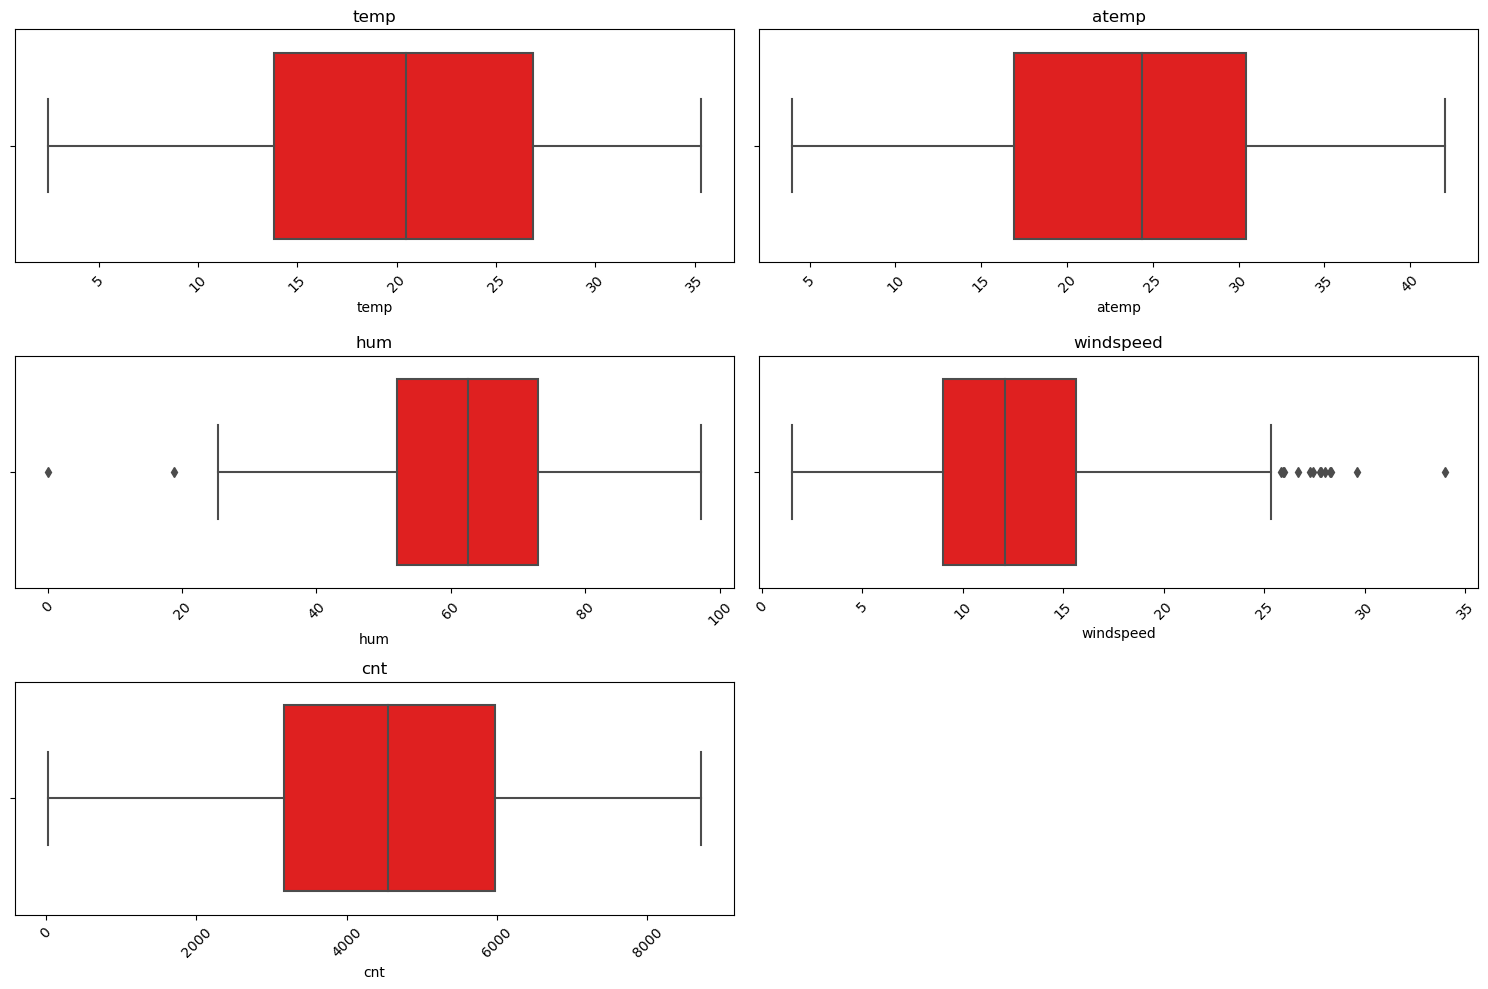

In [19]:
# plotting box plot for numerical columns to view the presence of outliers
plt.figure(figsize=(15,10))
for i in enumerate(num_cols):
    plt.subplot(3,2,i[0]+1)
    sns.boxplot(x=df1[i[1]],palette=['r'])
    plt.title(i[1])
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
# viewing 99 percentile and max values
df1["windspeed"].quantile([0.99,1])

0.99    27.380948
1.00    34.000021
Name: windspeed, dtype: float64

In [21]:
# viewing the difference in values between 0 percentile and 25 values
df1["hum"].quantile([0,0.25])

0.00     0.0
0.25    52.0
Name: hum, dtype: float64

**--Observations--**
* There are few outliers seen in **hum , windspeed** which is seen in box plot and could able to see the differences in their percentile values
* We can handle the outliers by capping the outlier values with upper bound and lower bound values respectively

In [22]:
#Capping outlier values in windspeed column above upper bound with upper bound values
q1=df1["windspeed"].describe()["25%"]
q3=df1["windspeed"].describe()["75%"]
iqr=q3-q1
upper_bound=q3+1.5*iqr
lower_bound=q1-1.5*iqr
df1["windspeed"]=np.where(df1["windspeed"]>upper_bound,upper_bound,df1["windspeed"])

In [23]:
#Capping outlier values in hum column below lower bound with lower bound values
q1=df1["hum"].describe()["25%"]
q3=df1["hum"].describe()["75%"]
iqr=q3-q1
upper_bound=q3+1.5*iqr
lower_bound=q1-1.5*iqr
df1["hum"]=np.where(df1["hum"]<lower_bound,lower_bound,df1["hum"])

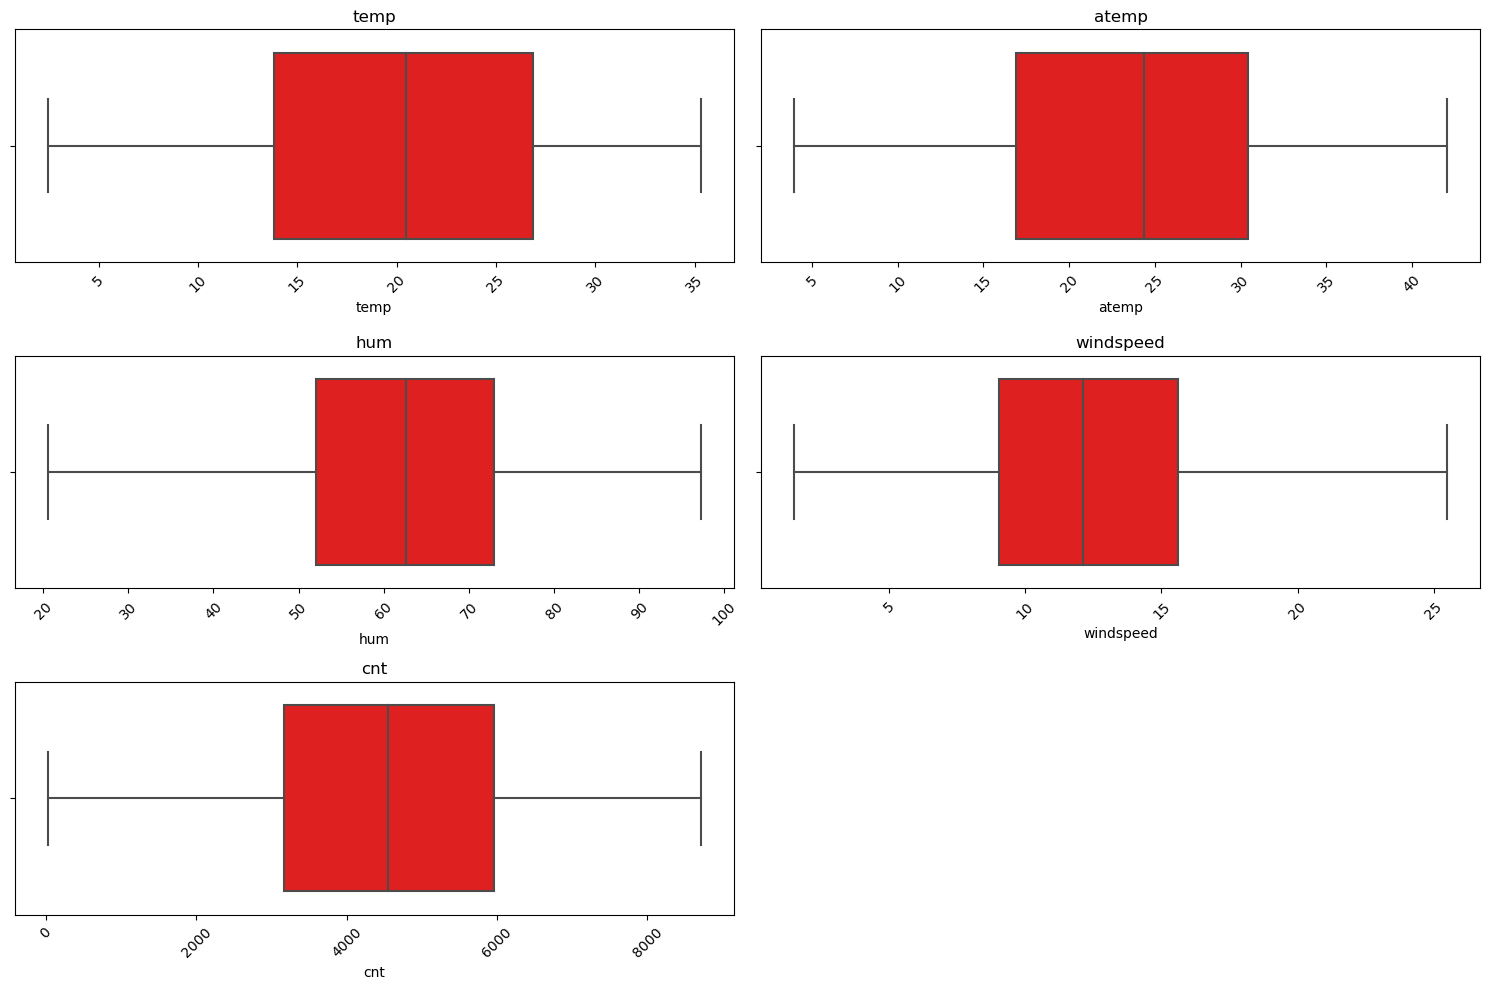

In [24]:
# viewing the values using boxplot after handling outliers
plt.figure(figsize=(15,10))
for i in enumerate(num_cols):
    plt.subplot(3,2,i[0]+1)
    sns.boxplot(x=df1[i[1]],palette=['r'])
    plt.title(i[1])
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### **--Observations--**
* Now the values in numerical columns looks good

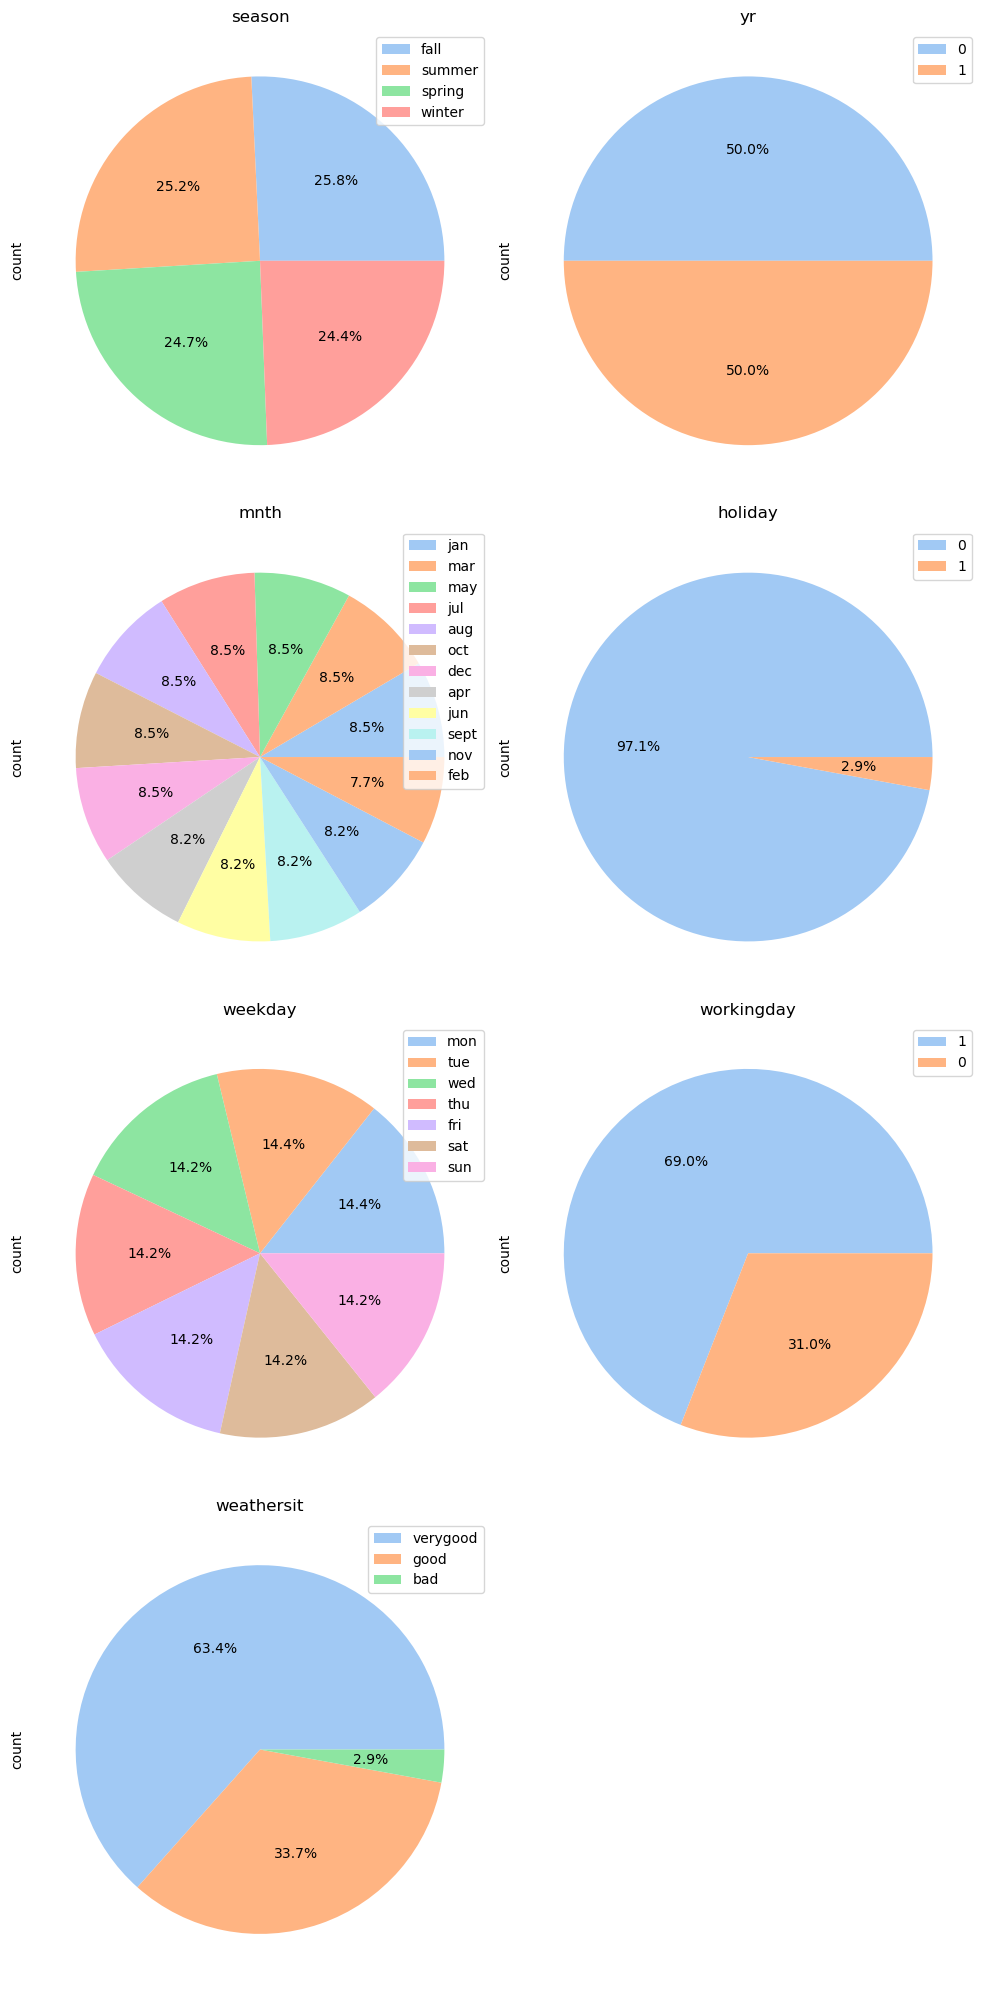

In [25]:
# Plotting pie plots for categorical columns
plt.figure(figsize=(10,20))
sns.set_palette("pastel")
for i in enumerate(cat_cols):
    plt.subplot(4,2,i[0]+1)
    df1[i[1]].value_counts().plot.pie(labeldistance=None,autopct='%1.1f%%')
    plt.title(i[1])
    plt.xticks(rotation=90)
    plt.legend()   
plt.tight_layout()
plt.show()

##### **--Observations--**
* season - All the seasons are equally distributed over the years
* yr- Two yr business data has been equally given in dataset
* mnth - all the months equally distributed over two years of business
* holiday - no of holidays are very less in two years of data
* weekday - data has been given equally for two years
* workingday - working days are more in two years of data
* weathersit - In two years of data most of the days weather seems to be very good/clear ; Also no business data is there during severely bad weather

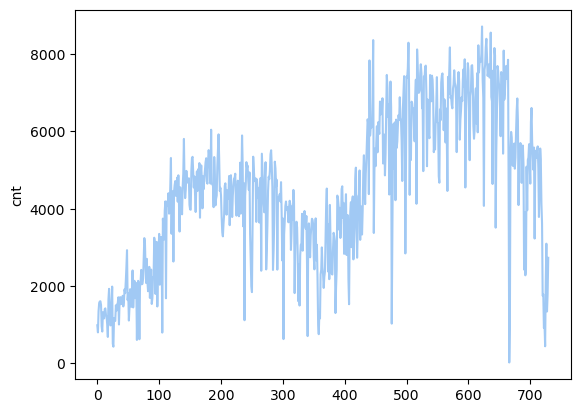

In [26]:
# To undersatnd the trend of target variable
sns.lineplot(df1["cnt"])
plt.show()

##### **--Observations--**
* We can see there is an increase in count (till approx 650 days) of bike rentals initially then decreased
* We can also say gradual increase from start of the year and then decreases during last months of year ; this trend is seen in 2018 as well as 2019; will investigate further on  this

##### **--4.2 Bivariate Analysis--**

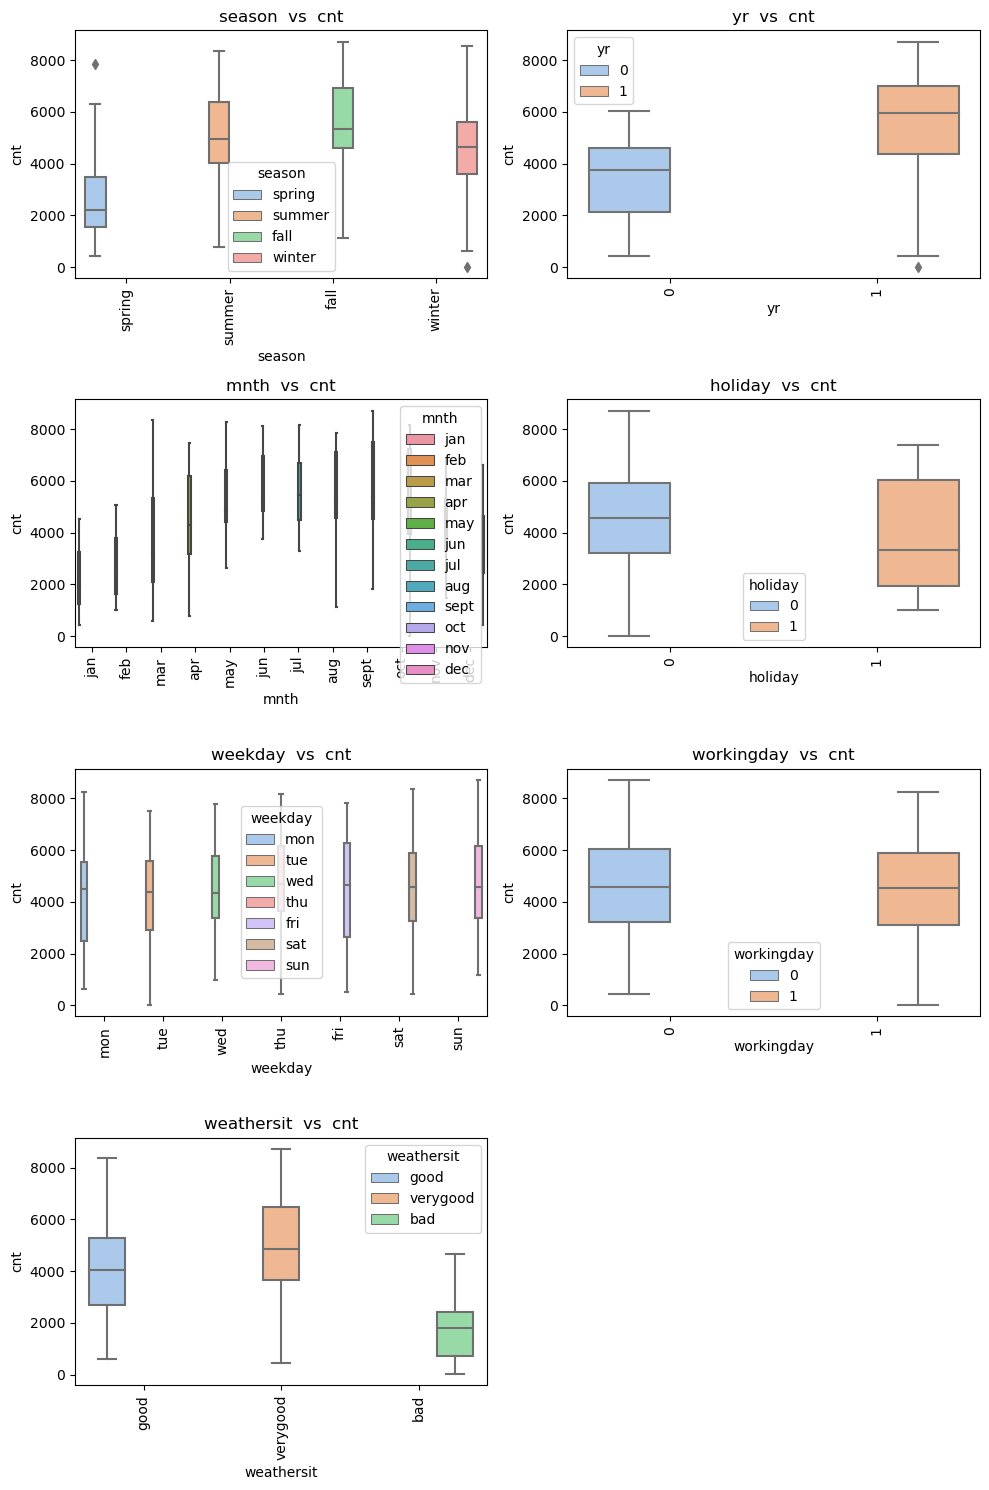

In [27]:
#  understanding relationship between categorical variable and target variable
plt.figure(figsize=(10,15))
sns.set_palette("pastel")
for i in enumerate(cat_cols):
    plt.subplot(4,2,i[0]+1)
    ax=sns.boxplot(x =df1[i[1]], y ='cnt',hue = df1[i[1]],data = df1,)
    plt.title(i[1]+"  vs  "+"cnt")
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


##### **--Observations-**
* **season** - The demand for bike rental is high during fall with median almost 5000; As this variable shows some trends this can be a **good predictor** for model
* **yr** - The demand for bike rental increased during 2019; As this variable shows some trends this can be a **good predictor** for model
* **mnth** - The demand for bike rental is high during jun-sept ;This trend for bike rental demand is already seen in line plot; As this variable shows some trends this can be a **good predictor** for model
* **holiday** - The demand for bike rental is high when it is not a holiday; this seems to go against the trend; So this is **not a good predictor**
* **weekday** - This variable does not show any trend for demand in bike rental ; So this is **not a good predictor**
* **workingday** - This variable does not show any trend for demand in bike rental ; So this is **not a good predictor**
* **weathersit** - The demand for bike rental is high when the weather is clear and good; As this variable shows some trends this can be a **good predictor** for model


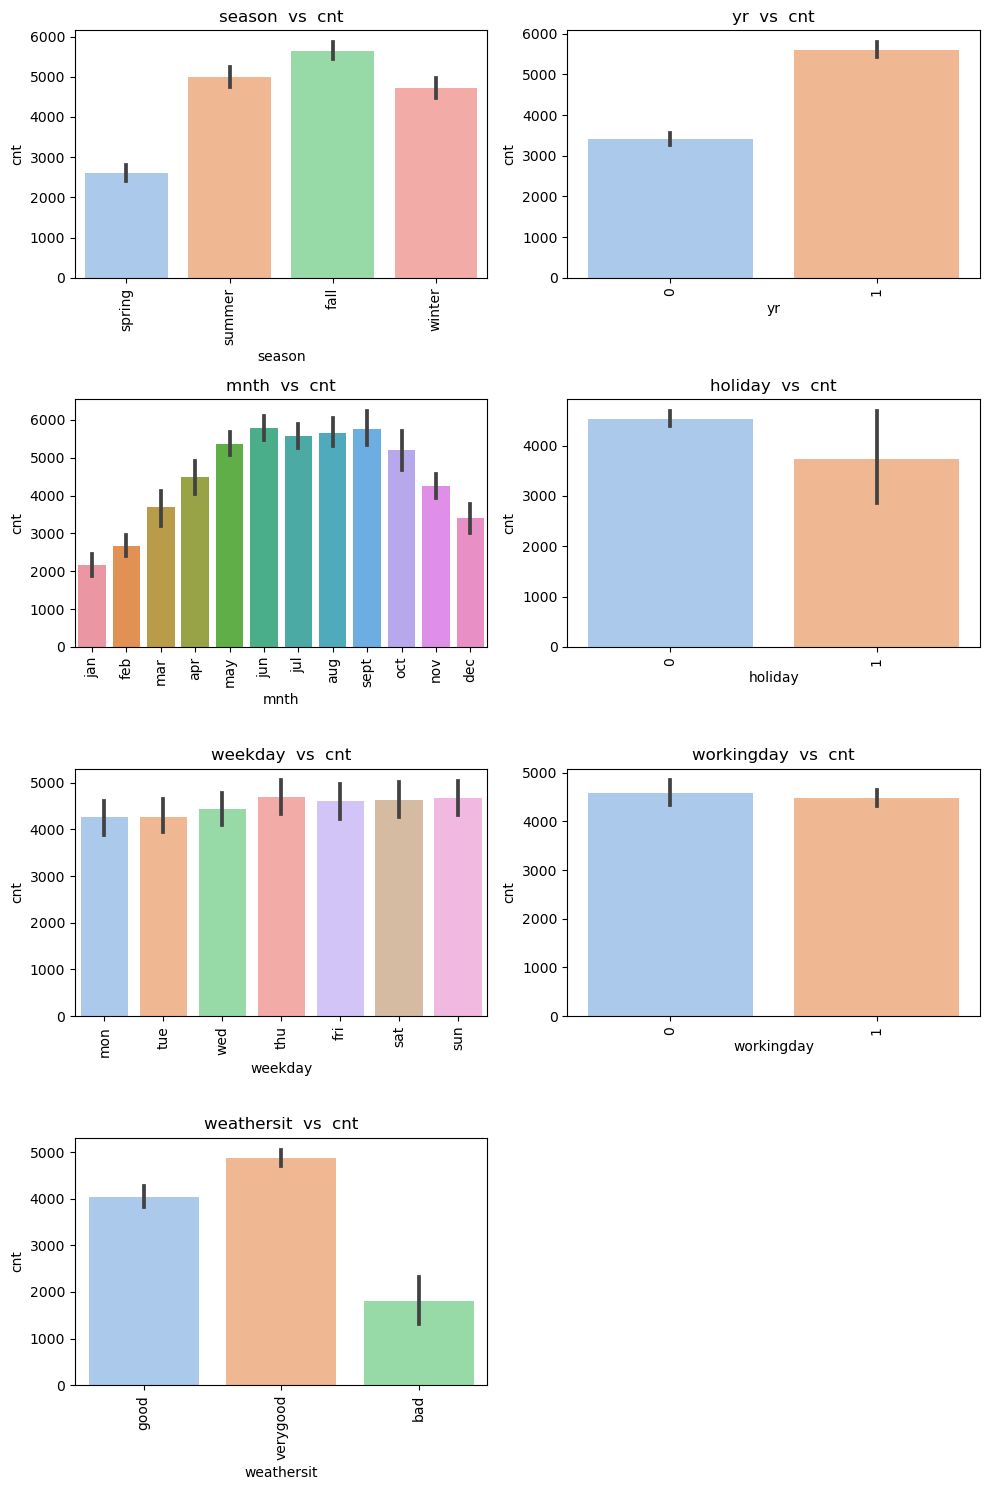

In [28]:
plt.figure(figsize=(10,15))
sns.set_palette("pastel")
for i in enumerate(cat_cols):
    plt.subplot(4,2,i[0]+1)
    ax=sns.barplot(x=df1[i[1]],y=df1["cnt"])
    plt.title(i[1]+"  vs  "+"cnt")
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##### **--Observations--**
* **weathersit** - The more number of bikes have been hired when the weather was very good/ very clear
* **workingday** - Mostly on both working day and not working days count of bike hired are same
* **weekday** - The count of rental bikes are almost same on all days. Comparitively, Mondays and tuesdays have less bike hiring
* **holiday** - The count of bike hiring were more on the days when it is not a holiday; this has to checked as it goes against the trend
* **mnth** - June to Sept seems to have more demand for rental bikes
* **yr** - 2019 have more demand for rental bikes than 2018
* **season** - Fall have more demand for rental bikes

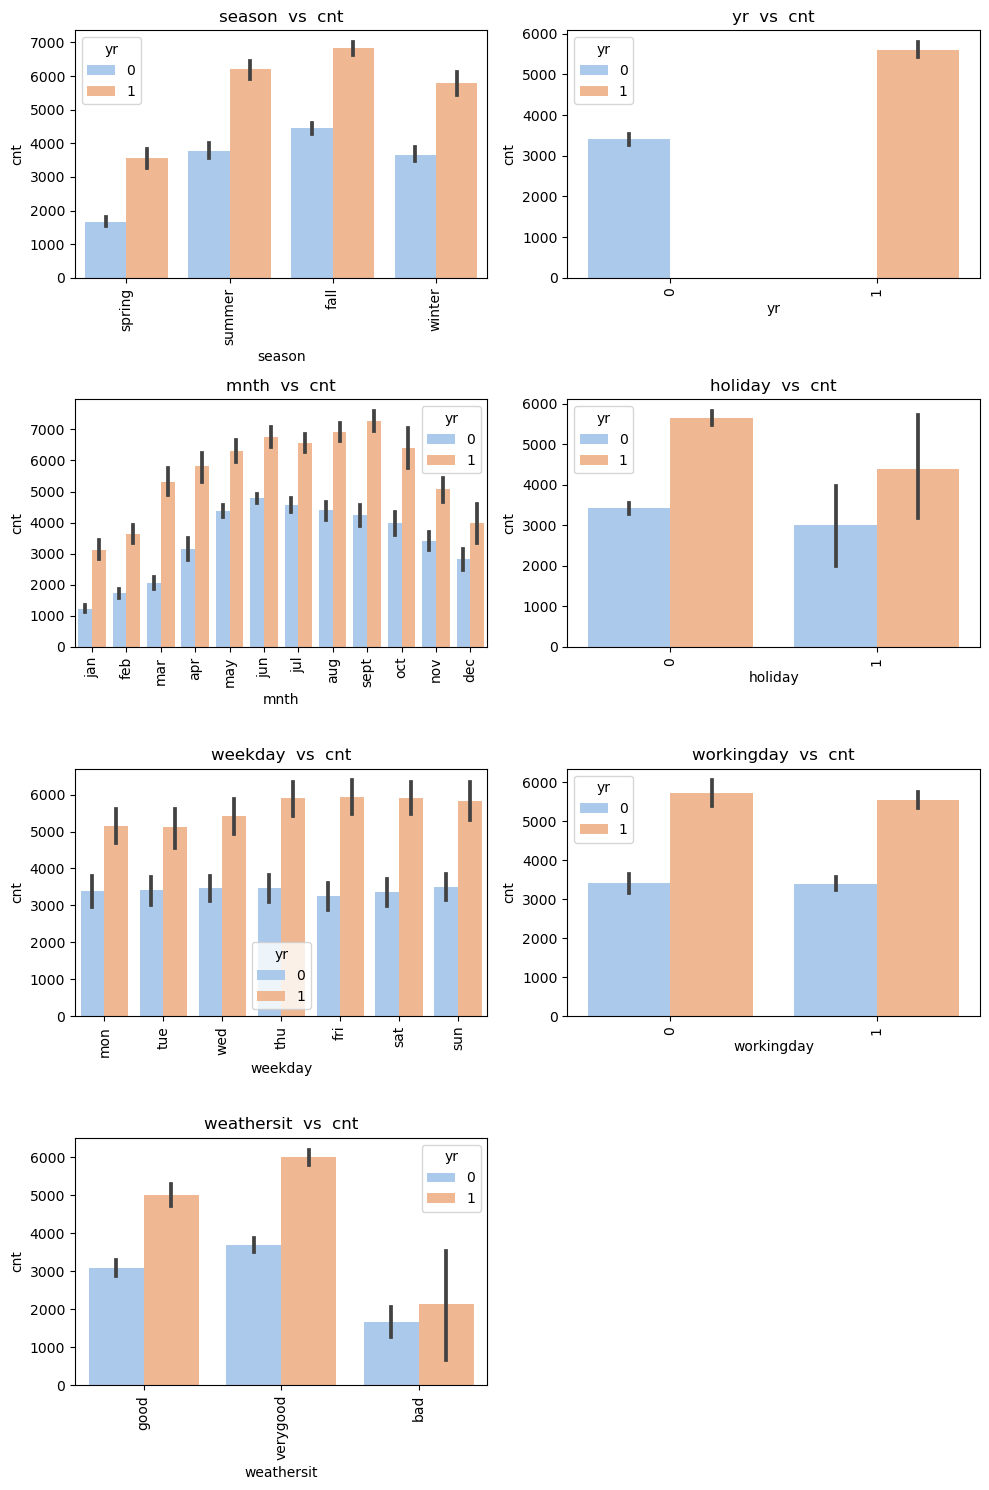

In [29]:
plt.figure(figsize=(10,15))
sns.set_palette("pastel")
for i in enumerate(cat_cols):
    plt.subplot(4,2,i[0]+1)
    ax=sns.barplot(x=df1[i[1]],y=df1["cnt"],hue=df1["yr"])
    plt.title(i[1]+"  vs  "+"cnt")
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##### **--Observations--**
* Overall graphs tells the number of bike rental happened more in 2019; This shows demand is increasing 

In [30]:
# segmenting the numerical columns
target=['cnt']
num_cols=['temp', 'atemp', 'hum', 'windspeed']
# segmenting categorical columns
cat_cols=['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit']

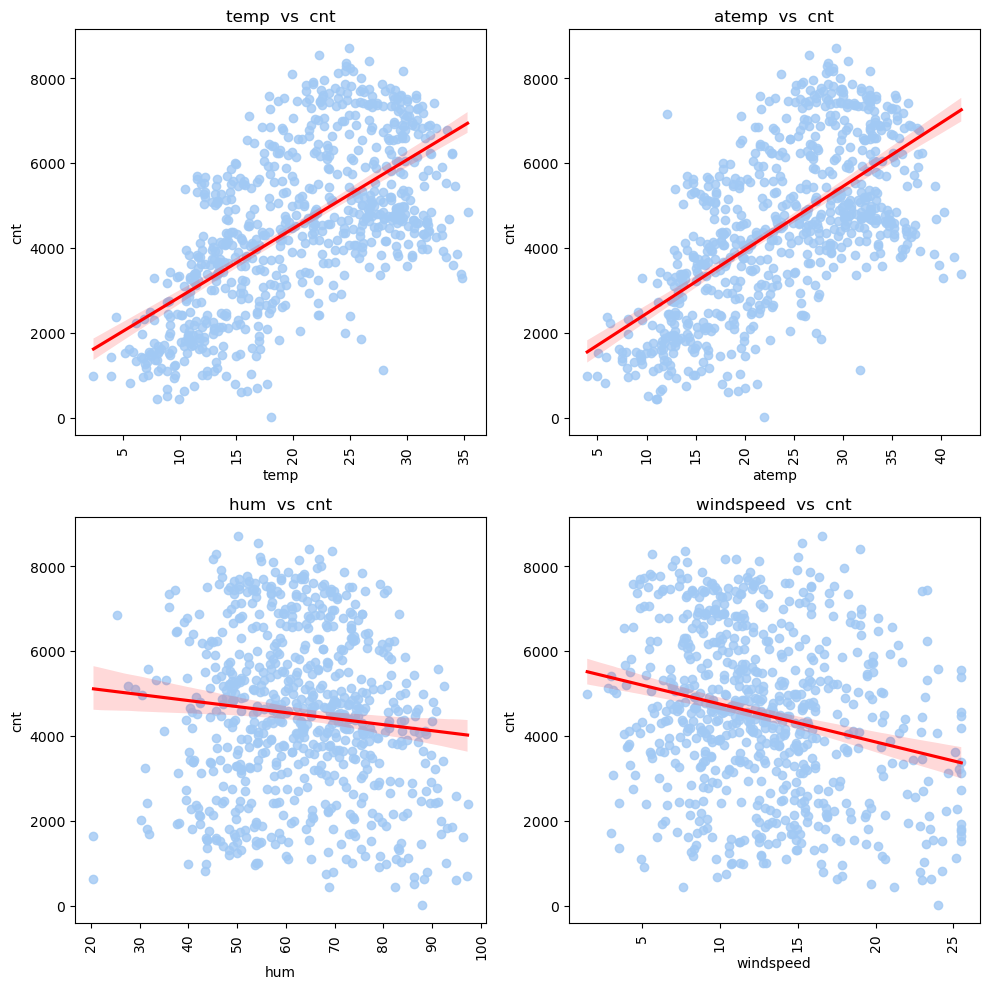

In [31]:
# understanding relationship between numerical variable and target variable
plt.figure(figsize=(10,10))
sns.set_palette("pastel")
for i in enumerate(num_cols):
    plt.subplot(2,2,i[0]+1)
    ax=sns.regplot(x =df1[i[1]], y ='cnt',data = df1,line_kws=dict(color="r"))
    plt.title(i[1]+"  vs  "+"cnt")
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##### **--Observations--**
* **temp** and **atemp** has positive correlation with cnt variable
* **hue** and **windspeed** has negative correlation with cnt variable

* This shows dependent variable **cnt** has linear relationship with independent variables; Thus we can proceed with **Multiple Linear Regression**

In [32]:
# segmenting the numerical columns
num_cols=['temp', 'atemp', 'hum', 'windspeed','cnt']
# segmenting categorical columns
cat_cols=['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit']

##### **--4.3 Multivariate Analysis--**

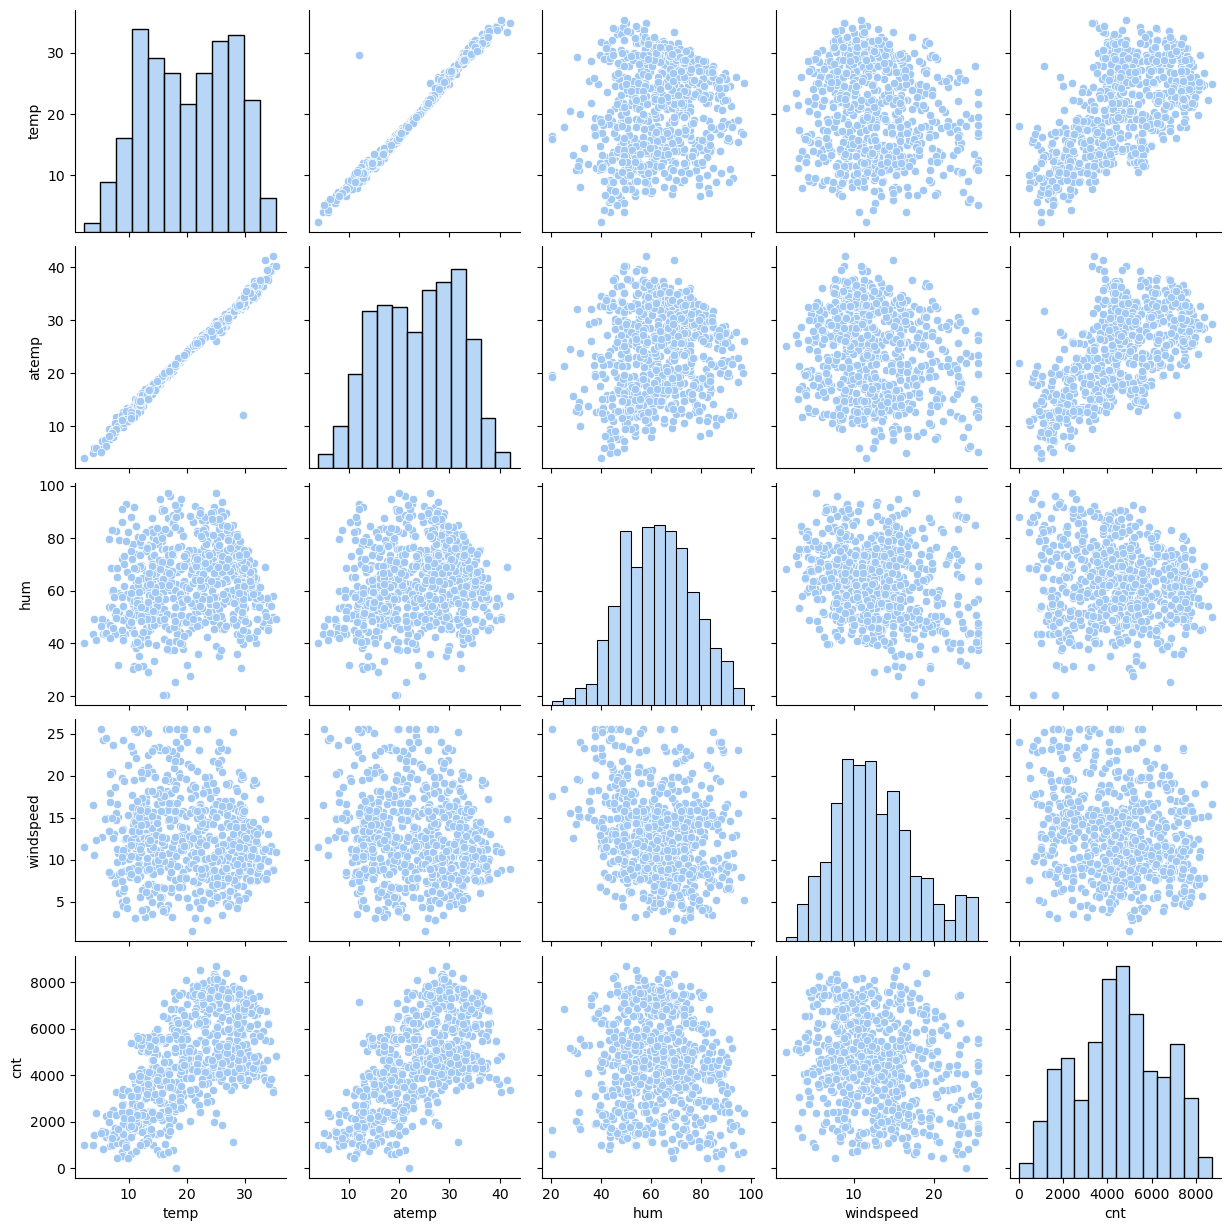

In [33]:
# understanding the relationship between numerical variable
sns.pairplot(df1[num_cols])

##### **--Observations--**
* **temp** and **atemp** has positive correlation with target variable **cnt**
* **hum** and **windspeed** has negative correlation with target variable **cnt**
* **temp** and **atemp** has positive correlation between themselves; which leads to collinearity; will study this later

In [34]:
# viewing the correlation between numerical variable 
# understanding the strength of linear relationship between numerical variable
df1[num_cols].corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128332,-0.157152,0.627044
atemp,0.991696,1.000000,0.141456,-0.183176,0.630685
hum,0.128332,0.141456,1.000000,-0.241170,-0.103566
windspeed,-0.157152,-0.183176,-0.241170,1.000000,-0.234234
cnt,0.627044,0.630685,-0.103566,-0.234234,1.000000


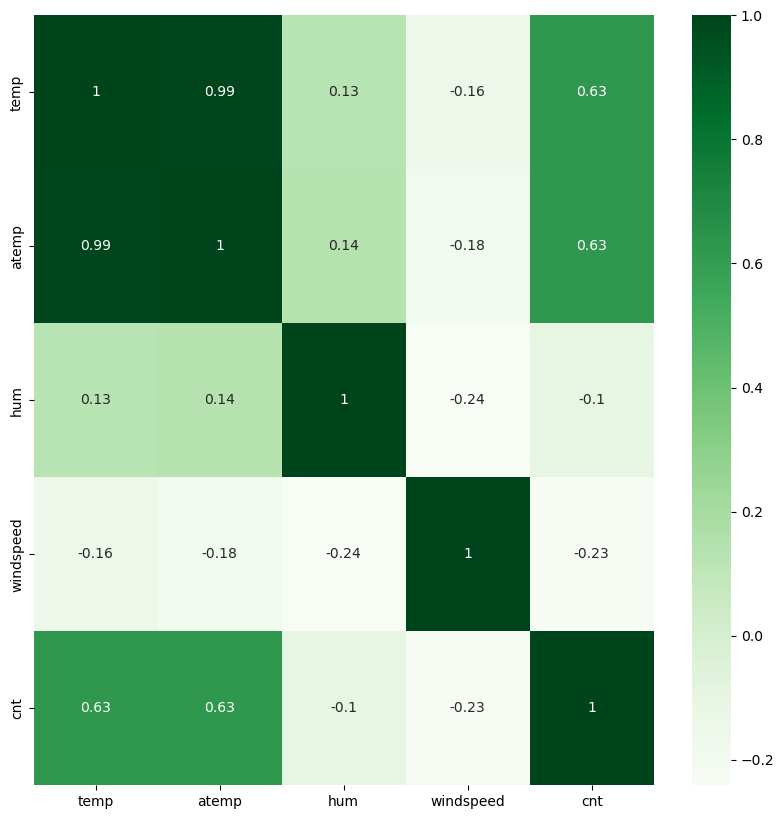

In [35]:
# plotting the correlation using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df1[num_cols].corr(),annot=True, cmap='Greens')
plt.show()

##### **--Observations--**
* Multicollinearity is seen between variables
* Few variables are positively correlated with each other ; Few are negatively correlated
* We will study and eliminate the variable accordingly later

### STEP 5 : Data Preparation for Linear Regression

##### **--5.1  Encoding --**

In [36]:
for i in cat_cols:
    print(df1[i].value_counts())
    print("\n")

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64


yr
0    365
1    365
Name: count, dtype: int64


mnth
jan     62
mar     62
may     62
jul     62
aug     62
oct     62
dec     62
apr     60
jun     60
sept    60
nov     60
feb     56
Name: count, dtype: int64


holiday
0    709
1     21
Name: count, dtype: int64


weekday
mon    105
tue    105
wed    104
thu    104
fri    104
sat    104
sun    104
Name: count, dtype: int64


workingday
1    504
0    226
Name: count, dtype: int64


weathersit
verygood    463
good        246
bad          21
Name: count, dtype: int64




In [37]:
# Variable season has 4 levels which can be reduced to 3 (n-1) level
# Variable mnth has 12 levels which can be reduced to 11 (n-1) level
# Variable weekday has 7 levels which can be reduced to 6 (n-1) level
# Variable weathersit has 4 levels as per data dictionary; already the data has 3 levels; so not reducing further to lose data

In [38]:
df1=pd.get_dummies(data=df1,columns=["mnth","weekday","season","weathersit"],drop_first=True,dtype=int)

In [39]:
df1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,season_spring,season_summer,season_winter,weathersit_good,weathersit_verygood
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [40]:
df1.shape

(730, 30)

In [41]:
df1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,season_spring,season_summer,season_winter,weathersit_good,weathersit_verygood
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


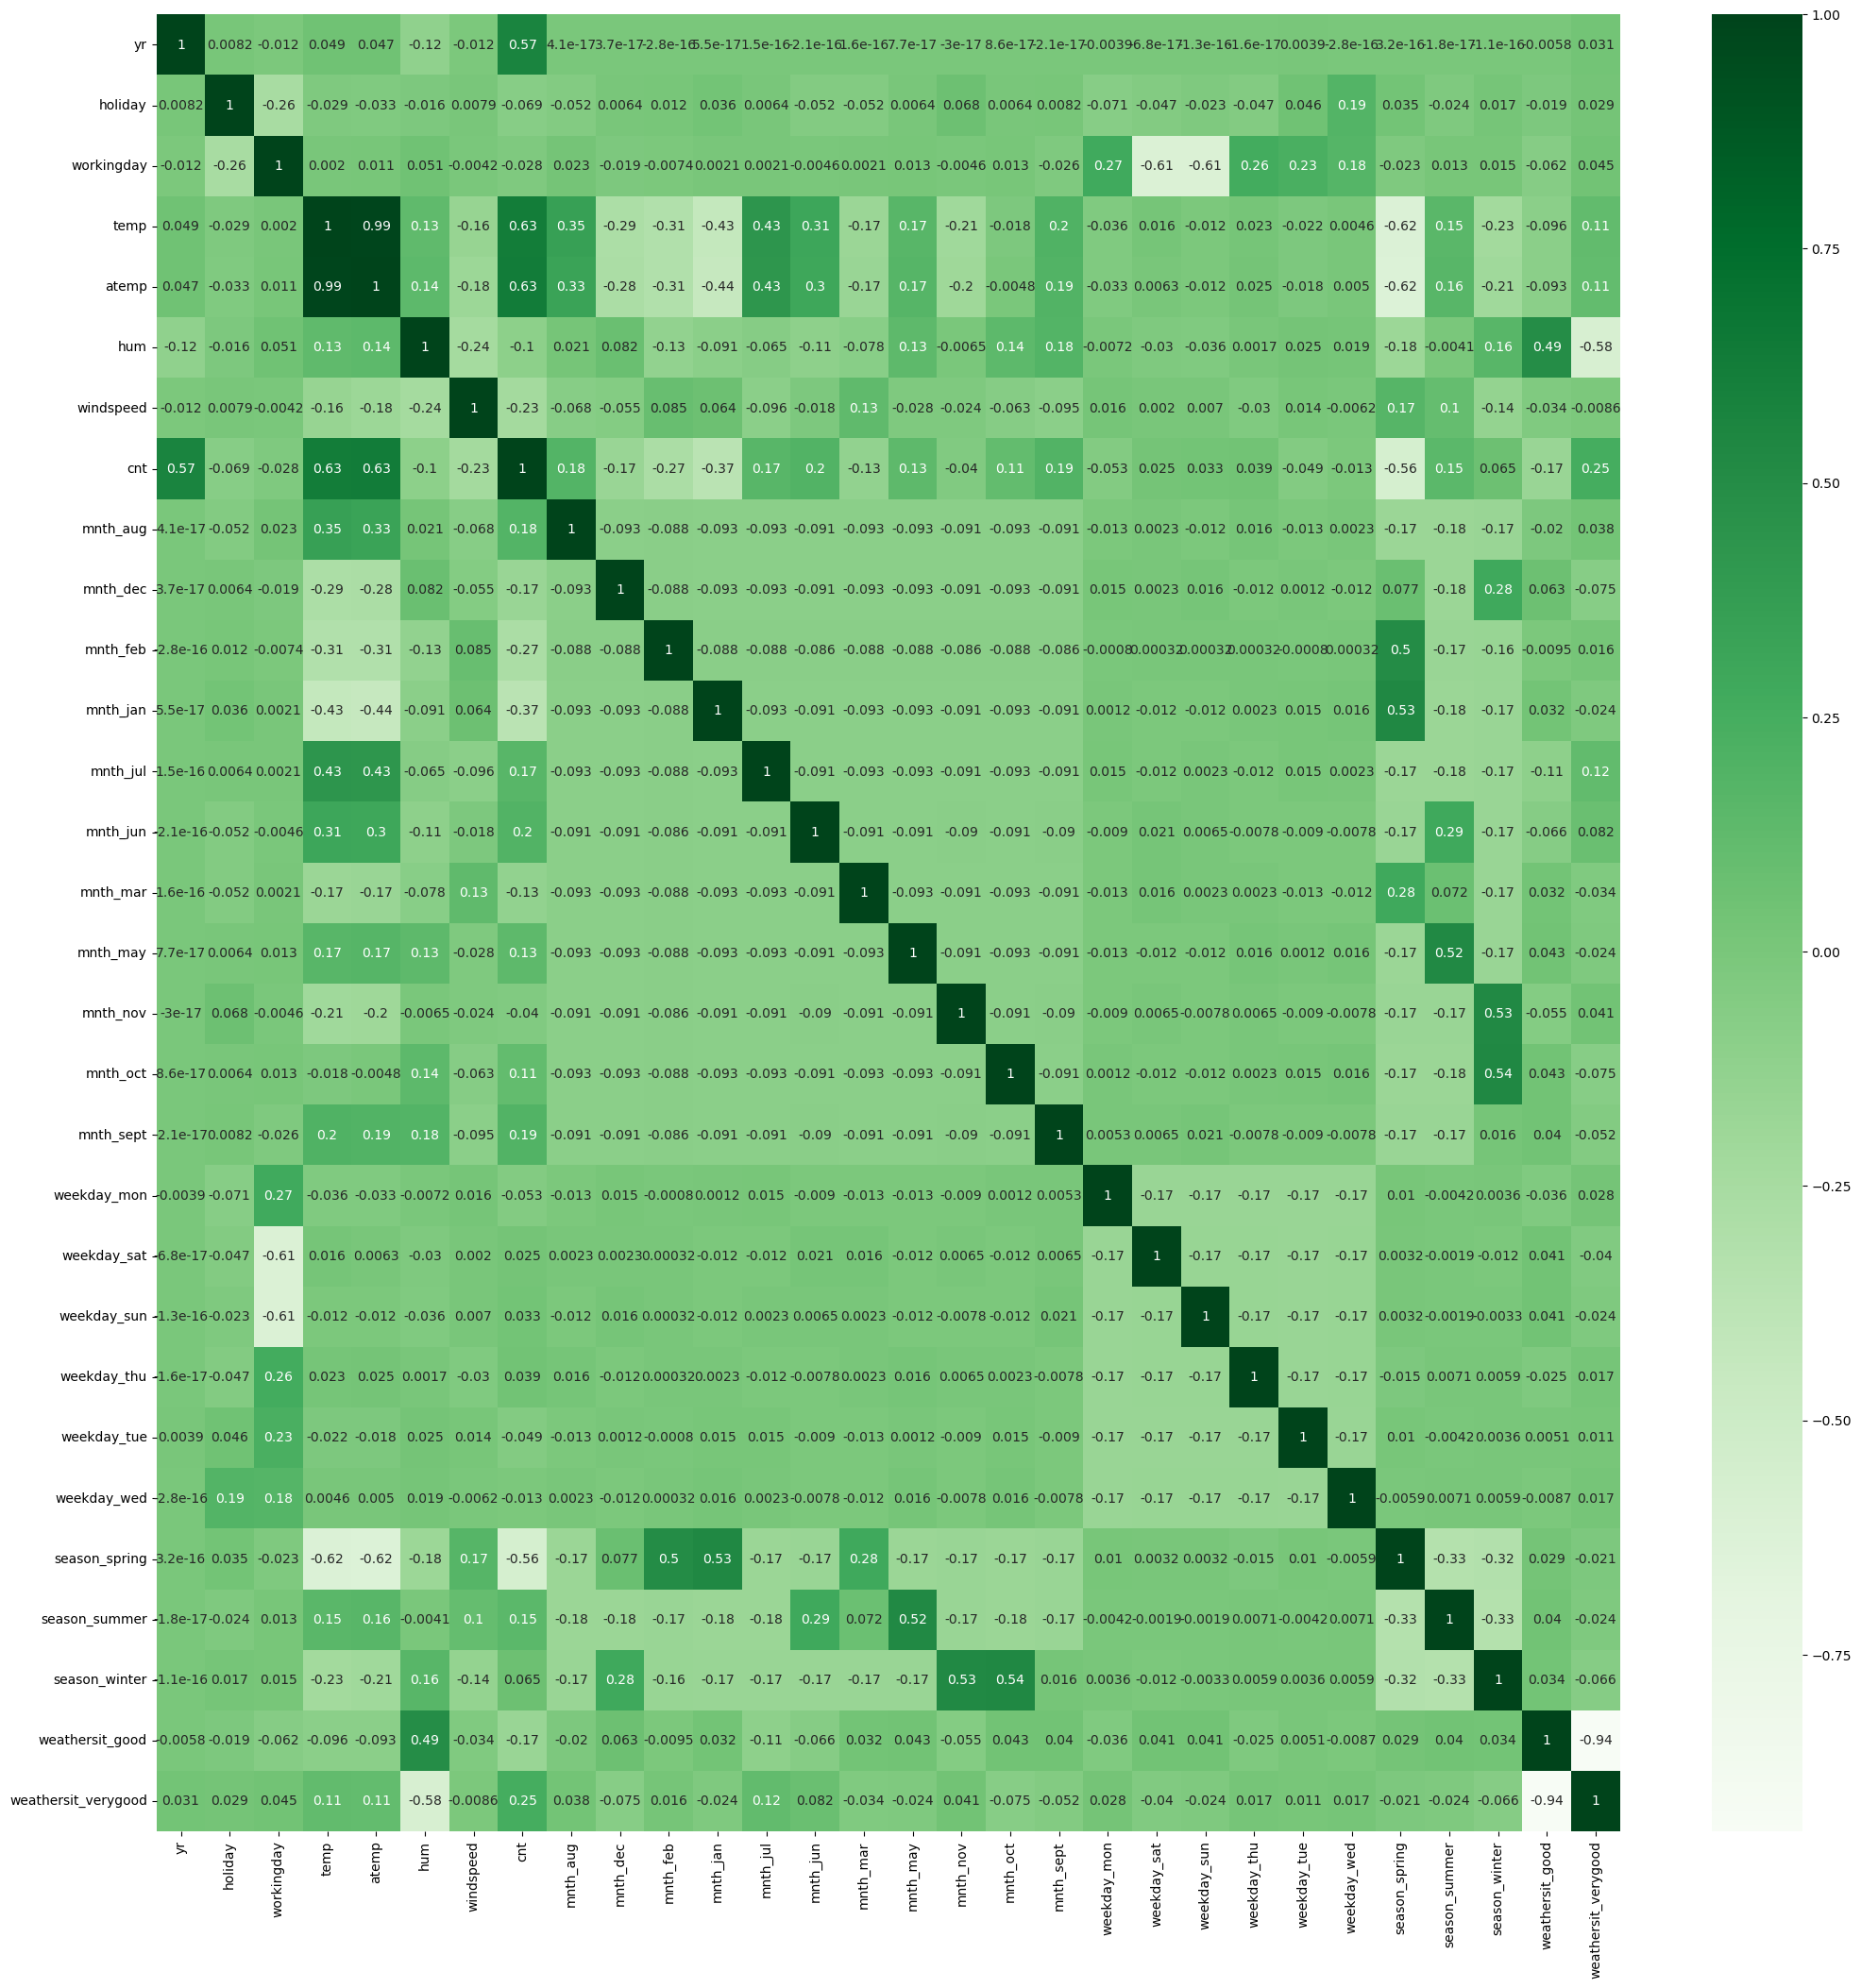

In [42]:
# To understand the multicollineartiy between variables
plt.figure(figsize = (25,25))
sns.heatmap(df1.corr(), annot = True, cmap="Greens")
plt.show()

**--Observations--**
* Multicollinearity exists between variables

### STEP 6 Model Building:


##### **--6.1  Train Test Split --**

In [43]:
# Splitting the data into train and test; Train data will be used for doing modelling and test data will be used to validate the model created
df1_train, df1_test = train_test_split(df1, train_size = 0.7, test_size = 0.3, random_state = 50)

In [44]:
df1_train.shape

(510, 30)

In [45]:
df1_test.shape

(219, 30)

##### **--6.2  Feature Rescaling  --**

In [46]:
#rescale the variables so that they have a comparable scale ( for numerical columns) 
# Using MinMax Scaler here
scaler = MinMaxScaler() # instantiate an object
df1_train[num_cols] = scaler.fit_transform(df1_train[num_cols]) # rescaling is done in numerical columns 
df1_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,season_spring,season_summer,season_winter,weathersit_good,weathersit_verygood
707,1,0,1,0.417140,0.434610,0.915062,0.335817,0.368845,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0
172,0,0,1,0.865247,0.858891,0.656435,0.378437,0.515992,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
14,0,0,1,0.223565,0.236172,0.383652,0.335781,0.141049,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
204,0,0,1,0.989306,1.000000,0.451711,0.369216,0.412333,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
182,0,0,1,0.871664,0.821838,0.312869,0.207800,0.586401,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [47]:
#Dividing into X and Y sets for the model building
y_train = df1_train.pop('cnt') # removing the target variable and assigning it to Y_train
X_train = df1_train

In [48]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'season_spring', 'season_summer',
       'season_winter', 'weathersit_good', 'weathersit_verygood'],
      dtype='object')

##### **--6.3 Model Building  --**

##### Automated Feature Elimination using Recursive Feature Elimination (RFE)


In [49]:
# using RFE
lr = LinearRegression() # instantiate an object
lr.fit(X_train, y_train)
rfe = RFE(lr, n_features_to_select=15)  # running RFE to select 15 features
rfe = rfe.fit(X_train, y_train)

In [50]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_)) # to view the order in which the elimination happened

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('mnth_aug', False, 13),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 6),
 ('mnth_jan', False, 4),
 ('mnth_jul', False, 5),
 ('mnth_jun', False, 9),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 8),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 12),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 10),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 14),
 ('weekday_tue', False, 7),
 ('weekday_wed', False, 11),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_verygood', True, 1)]

In [51]:
# Selected columns
cols=X_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'mnth_sept', 'weekday_sat', 'weekday_sun', 'season_spring',
       'season_summer', 'season_winter', 'weathersit_good',
       'weathersit_verygood'],
      dtype='object')

In [52]:
# Columns eliminated
X_train.columns[~rfe.support_]

Index(['mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'weekday_mon',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

##### **--6.4 Building Model using statsmodel  --**

* Now we will fine tune the variable by backward selection; Eliminating one by one variable which are insignificant

##### Model 1

In [53]:
X_train_m1 = X_train[cols]
X_train_m1 = sm.add_constant(X_train_m1)
lr = sm.OLS(y_train,X_train_m1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     182.5
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          2.31e-190
Time:                        17:55:57   Log-Likelihood:                 520.19
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1428    

In [54]:
X_train_m1 = X_train_m1.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_m1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
3,temp,389.48
4,atemp,377.40
2,workingday,59.69
14,weathersit_verygood,24.43
5,hum,18.47
8,weekday_sat,13.15
13,weathersit_good,11.76
9,weekday_sun,11.63
10,season_spring,6.24
6,windspeed,5.70


* Eliminating the variables **"atemp"** because of high p value and high VIF value

##### Model 2

In [55]:
X_train_m2 = X_train_m1.drop(["atemp"], axis = 1)
X_train_m2 = sm.add_constant(X_train_m2)
lr = sm.OLS(y_train,X_train_m2).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.9
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          1.81e-191
Time:                        17:55:58   Log-Likelihood:                 520.07
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     495   BIC:                            -946.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1416    

In [56]:
X_train_m2=X_train_m2.drop(["const"],axis=1)
vif = pd.DataFrame()
X = X_train_m2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
2,workingday,59.61
13,weathersit_verygood,24.30
3,temp,23.38
4,hum,18.37
7,weekday_sat,13.08
12,weathersit_good,11.72
8,weekday_sun,11.61
9,season_spring,6.19
5,windspeed,5.51
11,season_winter,4.57


* Eliminating **workingday** because of high VIF and p value; As we have already seen in EDA part workingday does not impact bike rentals

##### Model 3

In [57]:
X_train_m3 = X_train_m2.drop(["workingday"], axis = 1)
X_train_m3= sm.add_constant(X_train_m3)
lr = sm.OLS(y_train,X_train_m3).fit() 
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     210.4
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          3.13e-192
Time:                        17:55:58   Log-Likelihood:                 519.10
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     496   BIC:                            -950.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0440    

In [58]:
X_train_m3 = X_train_m3.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_m3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
2,temp,20.21
3,hum,14.52
12,weathersit_verygood,14.21
11,weathersit_good,8.13
8,season_spring,5.18
4,windspeed,4.80
10,season_winter,3.86
9,season_summer,2.72
0,yr,1.98
5,mnth_sept,1.27


* Eliminating **weekday_sat** as it has high p value and weekdays didnt not show good trend against bike rentals as seen in EDA

##### Model 4

In [59]:
X_train_m4 = X_train_m3.drop(["weekday_sat"], axis = 1)
X_train_m4= sm.add_constant(X_train_m4)
lr = sm.OLS(y_train,X_train_m4).fit() 
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     227.8
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          3.60e-193
Time:                        17:55:58   Log-Likelihood:                 518.51
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     497   BIC:                            -956.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0473    

In [60]:
X_train_final = X_train_m4.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_final
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
2,temp,20.01
3,hum,14.49
11,weathersit_verygood,14.21
10,weathersit_good,8.13
7,season_spring,5.13
4,windspeed,4.80
9,season_winter,3.83
8,season_summer,2.72
0,yr,1.98
5,mnth_sept,1.26


* Eliminating **hum** as it has high VIF value ; we have seens hum and temp are highly correlated

##### Model 5

In [61]:
X_train_m5 = X_train_m4.drop(["hum"], axis = 1)
X_train_m5= sm.add_constant(X_train_m5)
lr = sm.OLS(y_train,X_train_m5).fit() 
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.5
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          5.21e-187
Time:                        17:55:58   Log-Likelihood:                 501.08
No. Observations:                 510   AIC:                            -978.2
Df Residuals:                     498   BIC:                            -927.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0852    

In [62]:
X_train_m5 = X_train_m5.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_m5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
10,weathersit_verygood,13.86
2,temp,11.86
9,weathersit_good,7.96
3,windspeed,4.73
6,season_spring,3.79
8,season_winter,2.53
7,season_summer,2.39
0,yr,1.96
4,mnth_sept,1.21
5,weekday_sun,1.17


* Eliminating **weathersit_good** as it has high VIF value

In [63]:
X_train_m6 = X_train_m5.drop(["weathersit_good"], axis = 1)
X_train_m6= sm.add_constant(X_train_m6)
lr = sm.OLS(y_train,X_train_m6).fit() 
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     222.1
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          1.31e-176
Time:                        17:55:58   Log-Likelihood:                 473.66
No. Observations:                 510   AIC:                            -925.3
Df Residuals:                     499   BIC:                            -878.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0833    

In [64]:
X_train_final = X_train_m6.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_final
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.73
3,windspeed,4.72
9,weathersit_verygood,2.69
6,season_spring,1.96
0,yr,1.95
7,season_summer,1.90
8,season_winter,1.59
4,mnth_sept,1.19
5,weekday_sun,1.15
1,holiday,1.04


* Now the model look good with all the variables having low VIF and low p-value

In [65]:
# viewing the coefficients of all variables
lr.params.sort_values(ascending= False)

temp                   0.497377
yr                     0.239043
weathersit_verygood    0.092922
season_winter          0.090353
const                  0.083284
mnth_sept              0.071515
season_summer          0.064753
weekday_sun            0.035118
season_spring         -0.055353
holiday               -0.060893
windspeed             -0.126772
dtype: float64

In [66]:
lr.params.shape

(11,)

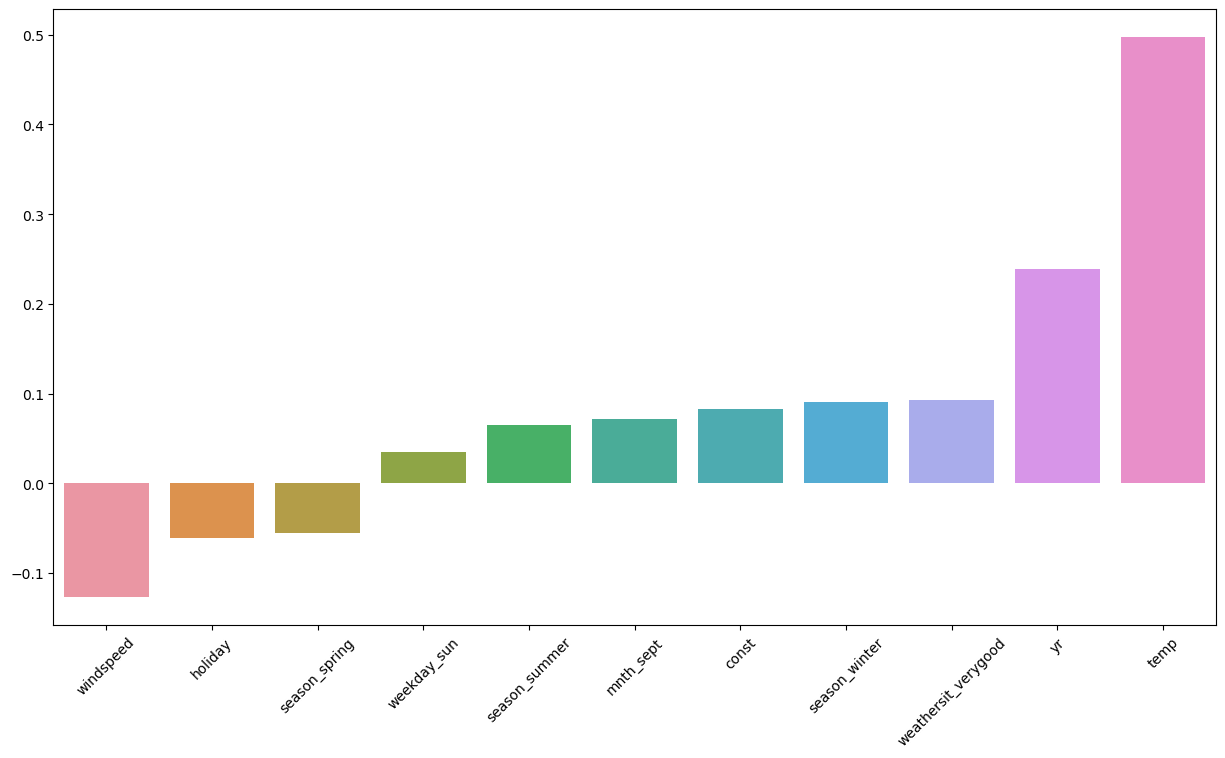

In [67]:
# Plotting the graph with coefficients to understand how much the variables are affecting target variable
plt.figure(figsize = (15, 8))
sns.barplot(x=lr.params.values , y=lr.params.values)
ticks = np.arange(0,11,1)
plt.xticks(ticks, labels = lr.params.sort_values().index)
plt.xticks(rotation=45)
plt.show()

* Temp, yr and windspeed affects the bike sharing business 

**--Observations--**
* The final model has all variables with
    - low p value ( less than 0.05)
    - F-statistic is large (222.1)
    - Prob (F-statistic) is nearly 0 (1.31e-176)
    - VIF values are less than 5
 * R square value : 0.817
 * Adj R squared value : 0.813

##### The Equation look like this:
**cnt = 0.083+ (temp * 0.497) + (yr * 0.239)  + (weathersit_verygood * 0.093) +   (season_winter * 0.090)+
    (mnth_sept * 0.072)  + (season_summer * 0.065) + (weekday_sun * 0.035)- (season_spring * 0.055) - (holiday * 0.061)- (windspeed * 0.127)**
   

**--Observations--**
* **const** -Eventhough none of the factors are present the demand for the rental bike increases by 0.083 units
* **temp** - Unit increase in temp increases demand of rental bike by 0.497 units
* **yr** - Unit increase in yr increases demand of rental bike by 0.237 units
* **weathersit_verygood** - Unit increase in weathersit_verygood increases demand of rental bike by 0.093 units
* **season_winter** - Unit increase in season_winter increases demand of rental bike by 0.090 units
* **mnth_sept** - Unit increase in mnth_sept increases demand of rental bike by 0.072 units
* **season_summer** - Unit increase in season_summer increases demand of rental bike by 0.065 units
* **weekday_sun** - Unit increase in weekday_sun increases demand of rental bike by 0.035 units
* **season_spring** - Unit increase in season_spring decreases demand of rental bike by 0.055 units
* **holiday** - Unit increase in holiday decreases demand of rental bike by 0.061 units
* **windspeed** - Unit increase in windspeed decreases demand of rental bike by 0.127 units


### Validating the Assumptions

#### Error terms are independent of each other

In [68]:
# VIF values are less than 5; This proves that there is no collinearity between variables
vif 

,Features,VIF
2,temp,4.73
3,windspeed,4.72
9,weathersit_verygood,2.69
6,season_spring,1.96
0,yr,1.95
7,season_summer,1.90
8,season_winter,1.59
4,mnth_sept,1.19
5,weekday_sun,1.15
1,holiday,1.04


#### Error terms are normally distributed

In [69]:
# To calculate error in train data vs predicted data
y_train_pred = lr.predict(X_train_m6)
res_train = y_train - y_train_pred

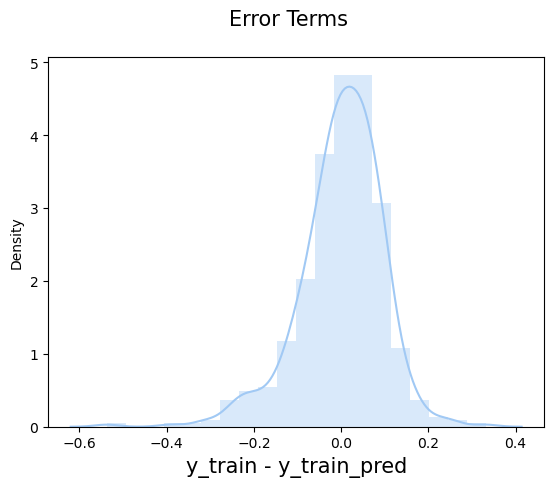

In [70]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()                        # X-label

**--Observations--**
* The error values are normally distributed ; has bell shaped curve centered on zero

#### Linear relationship between X and Y 

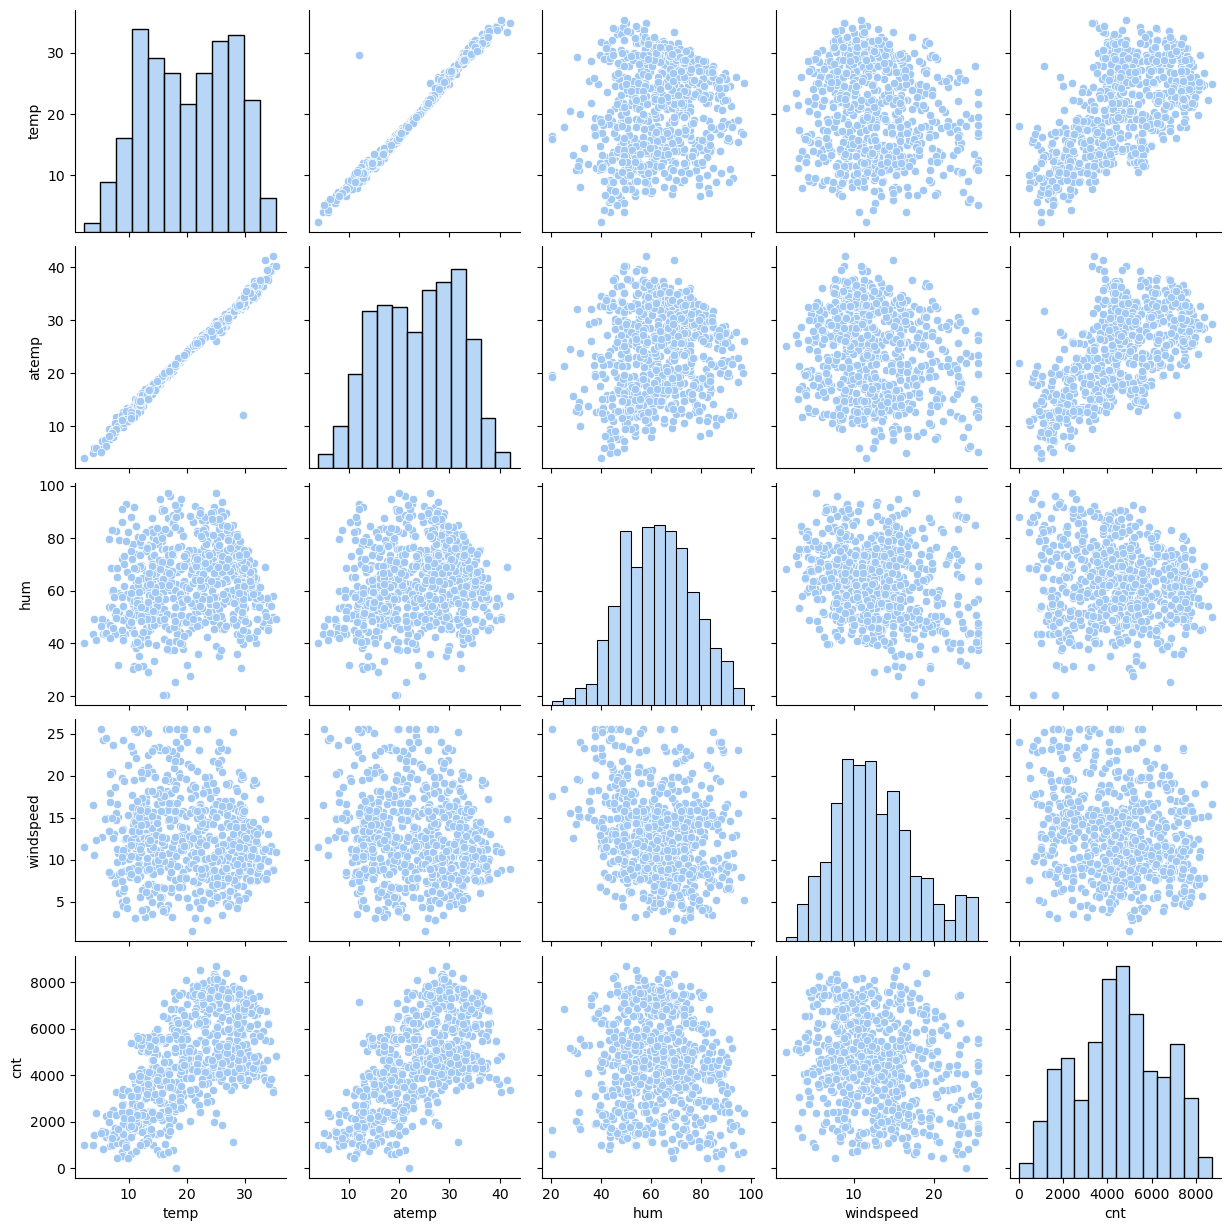

In [71]:
# To show the linear relationship between dependent and independent variables
sns.pairplot(df1[num_cols])
plt.show()

**--Observations--**
* The plot shows that there is linear relationship between **cnt** variable and other independent variables

#### Homoscedasicity

Text(0, 0.5, 'Residual')

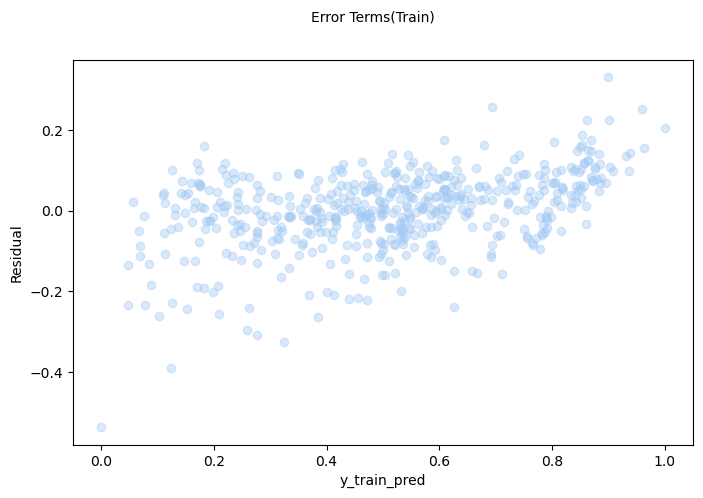

In [72]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure(figsize = (8,5))
res_train = y_train - y_train_pred
plt.scatter(y_train, res_train, alpha=.4) 
fig.suptitle('Error Terms(Train)', fontsize = 10)             
plt.xlabel('y_train_pred', fontsize = 10)                          
plt.ylabel('Residual', fontsize = 10)

**--Observation--**
* The plot shows that error values have constant variance

In [73]:
num_cols = ['temp', 'atemp', 'hum', 'windspeed','cnt']

### Making Predictions

#### Scaling test data

In [74]:
df1_test[num_cols] = scaler.transform(df1_test[num_cols])

In [75]:
df1_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,season_spring,season_summer,season_winter,weathersit_good,weathersit_verygood
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.538813,0.041096,0.671233,0.578218,0.570000,0.557474,0.419574,0.529866,0.077626,0.063927,0.077626,0.109589,0.100457,0.082192,0.063927,0.050228,0.068493,0.082192,0.123288,0.159817,0.127854,0.164384,0.136986,0.132420,0.123288,0.251142,0.246575,0.223744,0.324201,0.652968
std,0.499633,0.198967,0.470841,0.244747,0.237661,0.177790,0.229674,0.221380,0.268194,0.245183,0.268194,0.313092,0.301297,0.275286,0.245183,0.218916,0.253169,0.275286,0.329520,0.367276,0.334692,0.371472,0.344621,0.339723,0.329520,0.434663,0.432005,0.417707,0.469148,0.477117
min,0.000000,0.000000,0.000000,0.049103,0.031559,0.126777,-0.068650,0.089623,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.370502,0.384923,0.431293,0.254165,0.384261,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.593602,0.604831,0.544935,0.396995,0.525541,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.784503,0.761870,0.680936,0.560887,0.707087,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.029946,1.064361,1.002722,1.000000,0.981707,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
# Dividing the Test data into X and y
y_test = df1_test.pop('cnt')
X_test = df1_test

In [77]:
# Adding the variables of final model into test data
X_test_new = X_test[X_train_final.columns]

# Adding a constant variable 
X_test_new_const = sm.add_constant(X_test_new)

In [78]:
y_pred = lr.predict(X_test_new_const)

### Model Evaluation

Text(0, 0.5, 'y_pred')

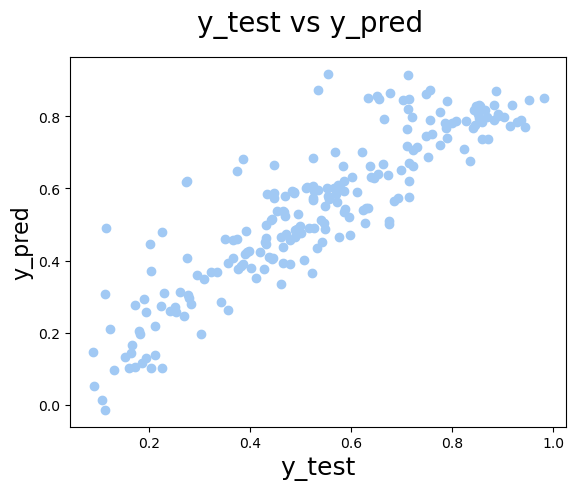

In [79]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

#### R2 Score 

In [80]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7774284302039092

**--Observations--**
* R2 of test data is within 5% range of test data; Which indicates the model is good 

In [81]:
X_test_new.shape

(219, 10)

In [82]:
# Calculating adjusted R2 value for test data
n = X_test.shape[0]
p = X_test.shape[1]
test_r2=round(r2_score(y_test, y_pred),4)
test_adj_r2=round(1-(1-test_r2)*( X_test_new.shape[0]-1)/( X_test_new.shape[0]-X_test_new.shape[1]-1),4)
print(test_r2)
print(test_adj_r2)

0.7774
0.7667


In [83]:
# Calculating RMSE value
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

0.10420303258275145

**--Observations--**
* RMSE value is low; which again tells the model looks good

## Final Summary
* Train data:
    - R2 Score    - 0.817
    - Adj R2 score- 0.813
* Test data:
    - R2 Score    - 0.777
    - Adj R2 score- 0.767
* From the equation we can see the top factors affecting the demand of bike rentals are :
    - Temp  - unit increase in temp increases the cnt by 0.497 units
    - yr    - unit increase in yr increases the cnt by 0.239 units
    - windspeed - unit increase in windspeed decreases the cnt by 0.127 units
